In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick
def func(x, m):
    return m*x

In [2]:
data_rod1 = np.loadtxt('./measured_spectra/rod_1.csv', \
                       skiprows=2, delimiter=';', dtype=float)
data_rod4 = np.loadtxt('./measured_spectra/rod_4.csv', \
                       skiprows=2, delimiter=';', dtype=float)
data_rod3 = np.loadtxt('./measured_spectra/rod_3.csv', \
                       skiprows=2, delimiter=';', dtype=float)
data_tpp1 = np.loadtxt('./measured_spectra/tpp_1.csv', \
                       skiprows=2, delimiter=';', dtype=float)
data_tpp2 = np.loadtxt('./measured_spectra/tpp_2.csv', \
                       skiprows=2, delimiter=';', dtype=float)

/home/daniel/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


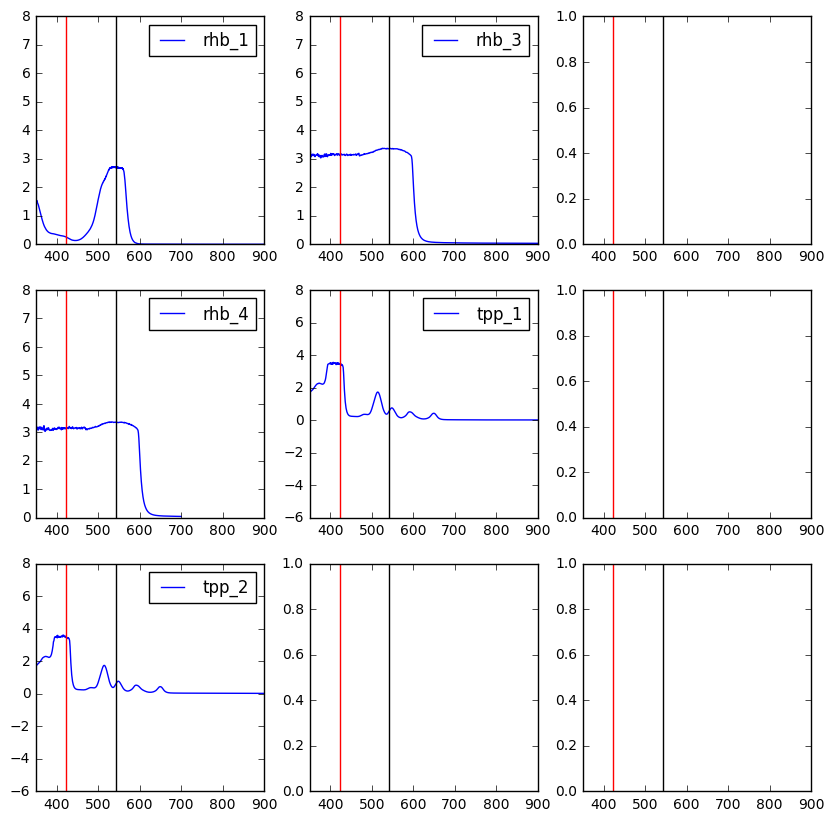

In [3]:
first, ax = plt.subplots(3, 3, figsize=(10, 10))
ax[0,0].plot(data_rod1[:,0], data_rod1[:,1], label='rhb_1')
ax[0,1].plot(data_rod3[:,0], data_rod3[:,1], label='rhb_3')
ax[1,0].plot(data_rod4[:,0], data_rod4[:,1], label='rhb_4')
ax[1,1].plot(data_tpp1[:,0], data_tpp1[:,1], label='tpp_1')
ax[2,0].plot(data_tpp2[:,0], data_tpp2[:,1], label='tpp_2')
#ax[2,1].plot(data_rod4[:,0], data_rod4[:,1], label='rhb_4')
for i in range(np.shape(ax)[0]):
    for k in range(np.shape(ax)[1]):
        ax[i,k].legend()
        ax[i, k].set_xlim(350, 900)
        ax[i,k].axvline(542.8, c='k')
        ax[i,k].axvline(422.8, c='r')

In [4]:
def conc_from_weight(w,ml, subs):
    if(subs=='rhb'):
        mw=479.02 #g/mol
    elif(subs=='zntpp'):
        mw=678.116 #g/mol
    return (w/mw)/ml

# 20 ml initially
weights = np.array([0.9,])
conc_from_weight(1e-3, 20., 'rhb')

1.043797753747234e-07

# Mediciones 16 Noviembre

A continuación se guardarán en una lista (`rhob_spectra`) de arreglos, los espectros correspondientes a las mediciones realizadas el 16 de Noviembre para la Rhodamina B. 

Se realizaron 8 mediciones a distintas concentraciones conocidas (`rhob_known_conc`). Se procedió de la siguiente manera:

+ 0.9mg de rhodamina en 20mL de CH3OH
+ Se incrementa la cantidad de solvente para disminuir la concentración, ya que se observa saturación en el espectro de absorbancia.
+ Se inicia agregando 5mL de solvente, luego se procede a agregar 10mL. Las cantidades exactas de solvente adicionadas se encuentran en el arreglo `rhob_solv_vol`.
+ Se consiguen los datos de coeficiente de extinción $\epsilon$ de [acá](http://omlc.org/spectra/PhotochemCAD/html/009.html).

In [5]:
rhob_m = 0.9e-3 #g
rhob_molar_m = 479.02 #g/mol
rhob_solv_vol = np.array([20, 25., 35, 45, 55, 62, 72, 82])*1e-3 #L
rhob_ext_coeff_raw = np.loadtxt('molar_ext_coeff.txt', dtype = float, skiprows=23)
rhob_ext_coeff_max = max(rhob_ext_coeff_raw[:,1])
rhob_spectra=[]
rhob_measure_n = np.arange(1,9)
rhob_max_abs=np.zeros([len(rhob_measure_n), 2])
rhob_max_2=np.zeros([len(rhob_measure_n), 2])
rhob_max_3=np.zeros([len(rhob_measure_n), 2])
rhob_ext_coeff = interp1d(rhob_ext_coeff_raw[:,0],rhob_ext_coeff_raw[:,1] , kind='cubic')
cut_tot =17
cut_2 = [100, 200]
cut_3 = [300, 350]
for i in range(len(rhob_measure_n)):
    data=np.loadtxt('./measured_spectra/rod_our_'+str(rhob_measure_n[i])+'.csv',\
                                   skiprows=2, dtype=float, delimiter=';')
    data2=data[cut_2[0]:cut_2[1]]
    data1=data[cut_tot:]
    data3=data[cut_3[0]:cut_3[1]]

    rhob_spectra.append(data1)

    rhob_max_abs[i,0]=np.mean(data1[:,0][data1[:,1]==max(data1[:,1])])
    rhob_max_abs[i,1]=max(data1[:,1])
    
    rhob_max_2[i,0]=np.mean(data2[:,0][data2[:,1]==max(data2[:,1])])
    rhob_max_2[i,1]=max(data2[:,1])
    
    rhob_max_3[i,0]=np.mean(data3[:,0][data3[:,1]==max(data3[:,1])])
    rhob_max_3[i,1]=max(data3[:,1])

rhob_known_conc = (rhob_m/rhob_molar_m)/rhob_solv_vol


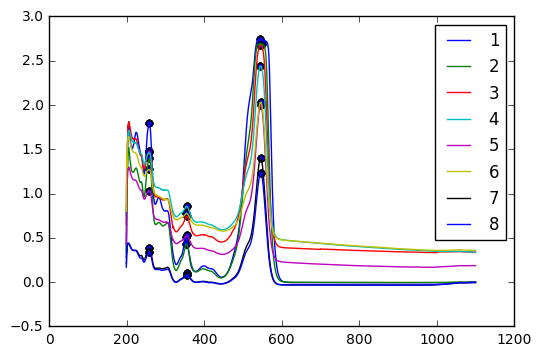

In [6]:

for i in range(len(rhob_measure_n)):
    plt.plot(rhob_spectra[i][:,0], rhob_spectra[i][:,1], label=rhob_measure_n[i])
    #plt.scatter(rhob_spectra[i][:,0][argrelextrema(rhob_spectra[i][:,1], np.greater)],\
    #            rhob_spectra[i][:,1][argrelextrema(rhob_spectra[i][:,1], np.greater)])
    plt.scatter(rhob_max_abs[:,0], rhob_max_abs[:,1])
    plt.scatter(rhob_max_2[:,0], rhob_max_2[:,1])
    plt.scatter(rhob_max_3[:,0], rhob_max_3[:,1])

    plt.grid()
plt.legend()

(0, 0.00012)

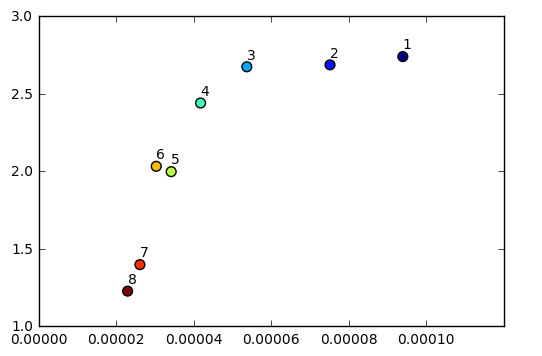

In [7]:
# Absorbancia en funcion de la concentración conocida
color=np.linspace(0, 1, len(rhob_known_conc))
plt.scatter(rhob_known_conc, rhob_max_abs[:,1], c=color, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
plt.legend()
plt.xlim(0, 0.00012)

(0, 0.00012)

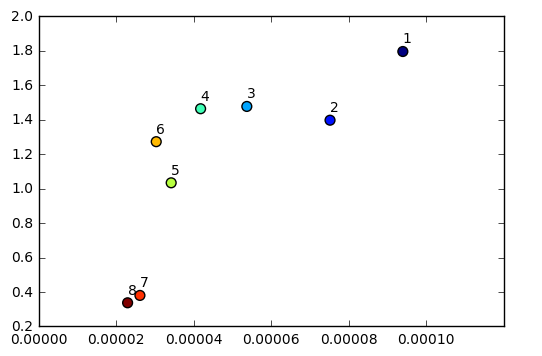

In [8]:
plt.scatter(rhob_known_conc, rhob_max_2[:,1], c=color, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_2[i,1]+0.05, str(rhob_measure_n[i]))
plt.xlim(0, 0.00012)

(0, 0.00012)

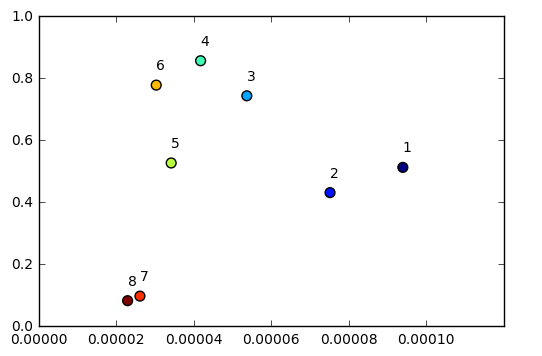

In [9]:
plt.scatter(rhob_known_conc, rhob_max_3[:,1], c=color, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_3[i,1]+0.05, str(rhob_measure_n[i]))
plt.xlim(0, 0.00012)

Recordemos que la absorbancia se relaciona con la concentración mediante
$$A=\epsilon c l,\ l=1cm$$

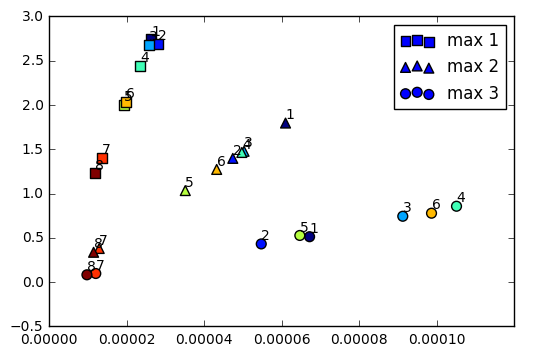

In [10]:
rhob_calc_conc_abs = []
rhob_calc_conc_2 = []
rhob_calc_conc_3 = []

for i in range(len(rhob_known_conc)):
    rhob_calc_conc_abs.append(rhob_max_abs[i,1]/rhob_ext_coeff(rhob_max_abs[i,0]))
    rhob_calc_conc_2.append(rhob_max_2[i,1]/rhob_ext_coeff(rhob_max_2[i,0]))
    rhob_calc_conc_3.append(rhob_max_3[i,1]/rhob_ext_coeff(rhob_max_3[i,0]))

rhob_calc_conc_abs = np.array(rhob_calc_conc_abs)
rhob_calc_conc_2 = np.array(rhob_calc_conc_2)
rhob_calc_conc_3 = np.array(rhob_calc_conc_3)

plt.scatter(rhob_calc_conc_abs, rhob_max_abs[:,1], c=color, s=50, marker='s', label='max 1')
plt.scatter(rhob_calc_conc_2, rhob_max_2[:,1], c=color, s=50, marker='^', label='max 2')
plt.scatter(rhob_calc_conc_3, rhob_max_3[:,1], c=color, s=50, marker='o', label='max 3')
for i in range(len(rhob_known_conc)):
    plt.text(rhob_calc_conc_abs[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_2[i], rhob_max_2[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_3[i], rhob_max_3[i,1]+0.05, str(rhob_measure_n[i]))
plt.xlim(0, 0.00012)
plt.legend()

55590.8854337 104244.807088


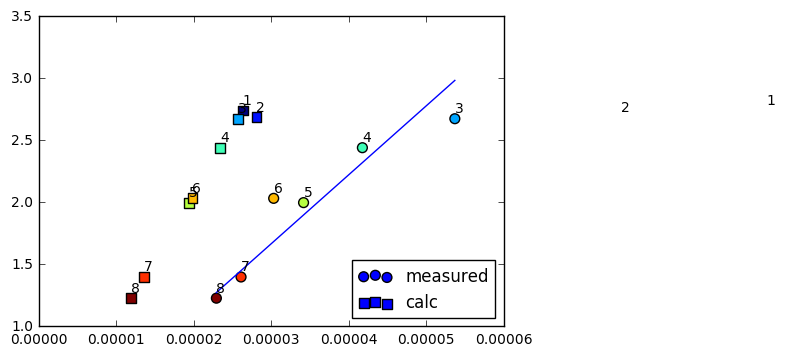

In [11]:
color=np.linspace(0, 1, len(rhob_known_conc))
plt.scatter(rhob_known_conc, rhob_max_abs[:,1], c=color, s=50, label='measured')
plt.scatter(rhob_calc_conc_abs, rhob_max_abs[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_abs[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00006)


rhob_abs_popt, rhob_abs_pcov = curve_fit(func, \
                                           rhob_known_conc[2:], rhob_max_abs[2:,1])
plt.plot(rhob_known_conc[2:], func(rhob_known_conc[2:],*rhob_abs_popt))
print rhob_abs_popt[0], rhob_ext_coeff(rhob_max_abs[0,0])

29304.5581632 29467.6712039


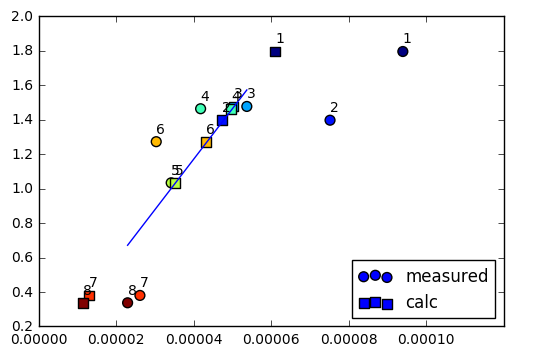

In [12]:
color=np.linspace(0, 1, len(rhob_known_conc))
plt.scatter(rhob_known_conc, rhob_max_2[:,1], c=color, s=50, label='measured')
plt.scatter(rhob_calc_conc_2, rhob_max_2[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_2[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_2[i], rhob_max_2[i,1]+0.05, str(rhob_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00012)


rhob_2_popt, rhob_2_pcov = curve_fit(func, \
                                           rhob_known_conc[2:], rhob_max_2[2:,1])
plt.plot(rhob_known_conc[2:], func(rhob_known_conc[2:],*rhob_2_popt))
print rhob_2_popt[0], rhob_ext_coeff(rhob_max_2[0,0])

15384.4819815 7639.05404243


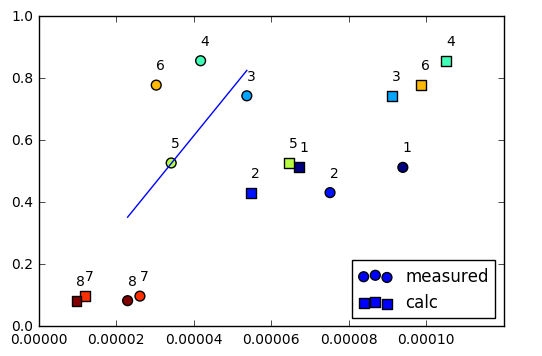

In [13]:
color=np.linspace(0, 1, len(rhob_known_conc))
plt.scatter(rhob_known_conc, rhob_max_3[:,1], c=color, s=50, label='measured')
plt.scatter(rhob_calc_conc_3, rhob_max_3[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_3[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_3[i], rhob_max_3[i,1]+0.05, str(rhob_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00012)


rhob_3_popt, rhob_3_pcov = curve_fit(func, \
                                           rhob_known_conc[2:], rhob_max_3[2:,1])
plt.plot(rhob_known_conc[2:], func(rhob_known_conc[2:],*rhob_3_popt))
print rhob_3_popt[0], rhob_ext_coeff(rhob_max_3[0,0])

[  2.62948350e-05   2.80846672e-05   2.56626692e-05   2.34208309e-05
   1.93523734e-05   1.98206612e-05   1.35445311e-05   1.18897124e-05]
[  9.39417978e-05   7.51534383e-05   5.36810273e-05   4.17519101e-05
   3.41606538e-05   3.03038058e-05   2.60949438e-05   2.29126336e-05]


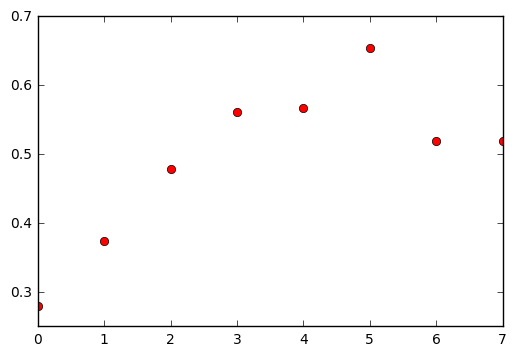

In [14]:
plt.plot(rhob_calc_conc_abs/rhob_known_conc, 'or')
print rhob_calc_conc_abs
print rhob_known_conc

# Mediciones 17 de noviembre
En este caso se cambió la técnica experimental. Se comenzó con 1.1g de ZnTPP en 20mL de tolueno. Luego, a la muestra de la cuña de cuarzo del espectrofotómetro se le varió la cantidad de solvente, se extrajo cada vez la mitad de la muestra y se reemplazó por tolueno, logrando así "mejores" mediciones.

In [15]:
zntpp_m = 1.1e-3 #g
zntpp_molar_m = 678.116 #g/mol
zntpp_solv_vol = np.array([40, 80, 160, 320, 640, 2*640])*1e-3*2 #L
zntpp_ext_coeff_raw = np.loadtxt('zntpp_molar_ext_coeff.txt', dtype = float, skiprows=23)
zntpp_ext_coeff_max = max(zntpp_ext_coeff_raw[:,1])
zntpp_spectra=[]
zntpp_measure_n = np.arange(2,8)
zntpp_max_abs=np.zeros([len(zntpp_measure_n), 2])
zntpp_max_2=np.zeros([len(zntpp_measure_n), 2])
zntpp_max_3=np.zeros([len(zntpp_measure_n), 2])
zntpp_ext_coeff = interp1d(zntpp_ext_coeff_raw[:,0],zntpp_ext_coeff_raw[:,1] , kind='cubic')
cut_tot =0
cut_2 = [450, 550]
for i in range(len(zntpp_measure_n)):
    data=np.loadtxt('./measured_spectra/tpp_our_'+str(zntpp_measure_n[i])+'.csv',\
                                   skiprows=2, dtype=float, delimiter=';')
    data2=data[cut_2[0]:cut_2[1]]
    data1=data[cut_tot:]
    data3=data[cut_3[0]:cut_3[1]]

    zntpp_spectra.append(data1)

    zntpp_max_abs[i,0]=np.mean(data1[:,0][data1[:,1]==max(data1[:,1])])
    zntpp_max_abs[i,1]=max(data1[:,1])
    
    zntpp_max_2[i,0]=np.mean(data2[:,0][data2[:,1]==max(data2[:,1])])
    zntpp_max_2[i,1]=max(data2[:,1])
    
   

zntpp_known_conc = (zntpp_m/zntpp_molar_m)/zntpp_solv_vol


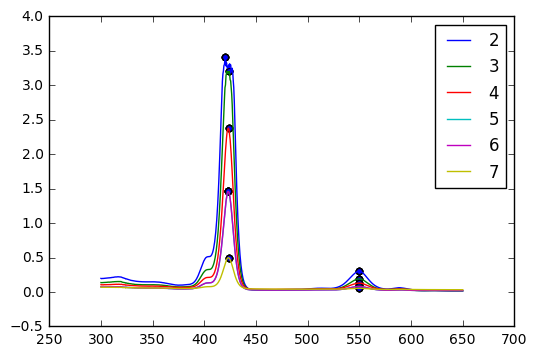

In [16]:
for i in range(len(zntpp_measure_n)):
    plt.plot(zntpp_spectra[i][:,0], zntpp_spectra[i][:,1], label=zntpp_measure_n[i])
    #plt.scatter(zntpp_spectra[i][:,0][argrelextrema(zntpp_spectra[i][:,1], np.greater)],\
    #            zntpp_spectra[i][:,1][argrelextrema(zntpp_spectra[i][:,1], np.greater)])
    plt.scatter(zntpp_max_abs[:,0], zntpp_max_abs[:,1])
    plt.scatter(zntpp_max_2[:,0], zntpp_max_2[:,1])

    plt.grid()
plt.legend()

(0, 6e-05)

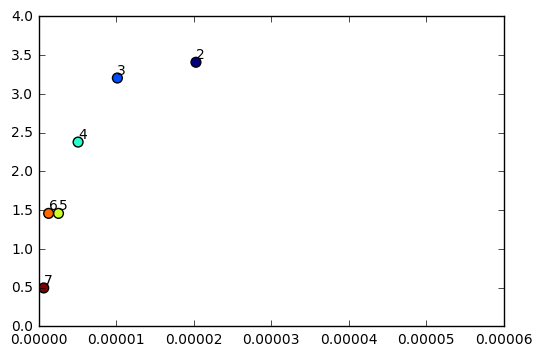

In [17]:
# Absorbancia en funcion de la concentración conocida
color=np.linspace(0, 1, len(zntpp_known_conc))
plt.scatter(zntpp_known_conc, zntpp_max_abs[:,1], c=color, s=50)
for i in range(len(zntpp_known_conc)):
    plt.text(zntpp_known_conc[i], zntpp_max_abs[i,1]+0.05, str(zntpp_measure_n[i]))
plt.legend()
plt.xlim(0, 0.00006)

(0, 6e-05)

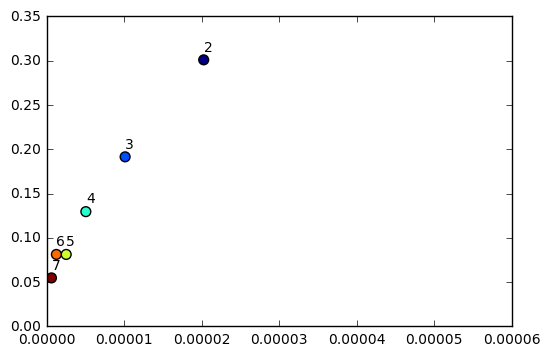

In [18]:
plt.scatter(zntpp_known_conc, zntpp_max_2[:,1], c=color, s=50)
for i in range(len(zntpp_known_conc)):
    plt.text(zntpp_known_conc[i], zntpp_max_2[i,1]+0.01, str(zntpp_measure_n[i]))
plt.xlim(0, 0.00006)

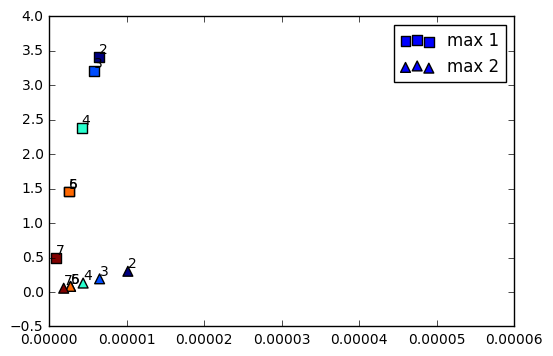

In [19]:
zntpp_calc_conc_abs = []
zntpp_calc_conc_2 = []

for i in range(len(zntpp_known_conc)):
    zntpp_calc_conc_abs.append(zntpp_max_abs[i,1]/zntpp_ext_coeff(zntpp_max_abs[i,0]))
    zntpp_calc_conc_2.append(zntpp_max_2[i,1]/zntpp_ext_coeff(zntpp_max_2[i,0]))

zntpp_calc_conc_abs = np.array(zntpp_calc_conc_abs)
zntpp_calc_conc_2 = np.array(zntpp_calc_conc_2)

plt.scatter(zntpp_calc_conc_abs, zntpp_max_abs[:,1], c=color, s=50, marker='s', label='max 1')
plt.scatter(zntpp_calc_conc_2, zntpp_max_2[:,1], c=color, s=50, marker='^', label='max 2')
for i in range(len(zntpp_known_conc)):
    plt.text(zntpp_calc_conc_abs[i], zntpp_max_abs[i,1]+0.05, str(zntpp_measure_n[i]))
    plt.text(zntpp_calc_conc_2[i], zntpp_max_2[i,1]+0.05, str(zntpp_measure_n[i]))
plt.xlim(0, 0.00006)
plt.legend()

525089.399861 531829.530857


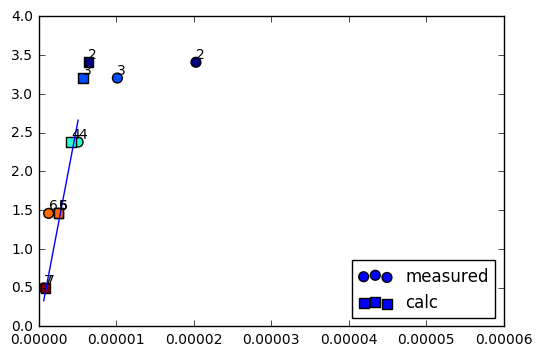

In [20]:
color=np.linspace(0, 1, len(zntpp_known_conc))
plt.scatter(zntpp_known_conc, zntpp_max_abs[:,1], c=color, s=50, label='measured')
plt.scatter(zntpp_calc_conc_abs, zntpp_max_abs[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(zntpp_known_conc)):
    plt.text(zntpp_known_conc[i], zntpp_max_abs[i,1]+0.05, str(zntpp_measure_n[i]))
    plt.text(zntpp_calc_conc_abs[i], zntpp_max_abs[i,1]+0.05, str(zntpp_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00006)


zntpp_abs_popt, zntpp_abs_pcov = curve_fit(func, \
                                           zntpp_known_conc[2:], zntpp_max_abs[2:,1])
plt.plot(zntpp_known_conc[2:], func(zntpp_known_conc[2:],*zntpp_abs_popt))
print zntpp_abs_popt[0], zntpp_ext_coeff(zntpp_max_abs[0,0])

29324.08566 29690.0340919


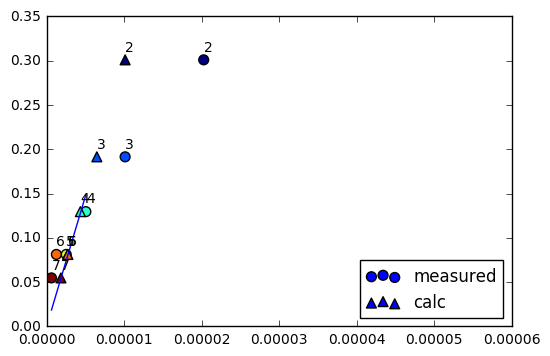

In [21]:
plt.scatter(zntpp_known_conc, zntpp_max_2[:,1], c=color, s=50, label='measured')
plt.scatter(zntpp_calc_conc_2, zntpp_max_2[:,1], c=color, s=50, marker='^', label='calc')

for i in range(len(zntpp_known_conc)):
    plt.text(zntpp_known_conc[i], zntpp_max_2[i,1]+0.01, str(zntpp_measure_n[i]))
    plt.text(zntpp_calc_conc_2[i], zntpp_max_2[i,1]+0.01, str(zntpp_measure_n[i]))

plt.xlim(0, 0.00006)
plt.legend(loc=4)

zntpp_2_popt, zntpp_2_pcov = curve_fit(func, \
                                           zntpp_known_conc[2:], zntpp_max_2[2:,1])
#zntpp_2_popt*=2

plt.plot(zntpp_known_conc[2:], func(zntpp_known_conc[2:],*zntpp_2_popt))
print zntpp_2_popt[0], zntpp_ext_coeff(zntpp_max_2[0,0])

En general, las concentraciones medidas parecen ser el doble de las calculadas.

# Mediciones 22 de Noviembre

In [44]:
rhob_m = 0.9e-3 #g
rhob_molar_m = 479.02 #g/mol
rhob_solv_vol = np.array([20, 25., 35, 45, 55, 62, 72, 82])*1e-3 #L
rhob_ext_coeff_raw = np.loadtxt('molar_ext_coeff.txt', dtype = float, skiprows=23)
rhob_ext_coeff_max = max(rhob_ext_coeff_raw[:,1])
rhob_spectra=[]
rhob_measure_n = np.arange(1,11)
rhob_max_abs=np.zeros([len(rhob_measure_n), 2])
rhob_max_2=np.zeros([len(rhob_measure_n), 2])
rhob_max_3=np.zeros([len(rhob_measure_n), 2])
print rhob_ext_coeff_raw[:,0][-1]
rhob_ext_coeff = interp1d(rhob_ext_coeff_raw[:,0],rhob_ext_coeff_raw[:,1] , kind='cubic')
cut_tot =60
cut_2 = [100, 200]
cut_3 = [300, 350]
for i in range(len(rhob_measure_n)):
    data=np.loadtxt('./measured_spectra/rod_our_'+str(rhob_measure_n[i])+'_nov22'+'.csv',\
                                   skiprows=2, dtype=float, delimiter=';')
    data2=data[cut_2[0]:cut_2[1]]
    data1=data[cut_tot:-900]
    data3=data[cut_3[0]:cut_3[1]]

    rhob_spectra.append(data1)

    rhob_max_abs[i,0]=np.mean(data1[:,0][data1[:,1]==max(data1[:,1])])
    rhob_max_abs[i,1]=max(data1[:,1])
    
    rhob_max_2[i,0]=np.mean(data2[:,0][data2[:,1]==max(data2[:,1])])
    rhob_max_2[i,1]=max(data2[:,1])
    
    rhob_max_3[i,0]=np.mean(data3[:,0][data3[:,1]==max(data3[:,1])])
    rhob_max_3[i,1]=max(data3[:,1])
print rhob_spectra[0][-1,0]
rhob_known_conc_0 = (0.9e-3/rhob_molar_m)/82e-3
rhob_known_conc = rhob_known_conc_0*(2./3)**np.arange(0,10)


700.0
650.0


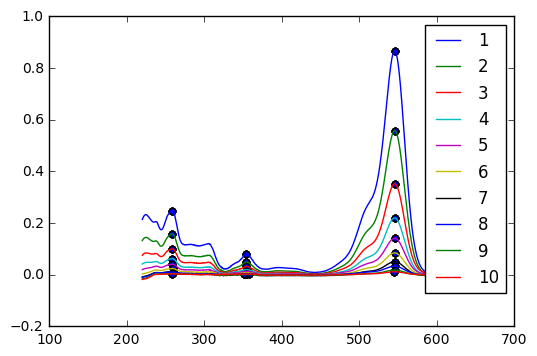

In [45]:

for i in range(len(rhob_measure_n)):
    plt.plot(rhob_spectra[i][:,0], rhob_spectra[i][:,1], label=rhob_measure_n[i])
    #plt.scatter(rhob_spectra[i][:,0][argrelextrema(rhob_spectra[i][:,1], np.greater)],\
    #            rhob_spectra[i][:,1][argrelextrema(rhob_spectra[i][:,1], np.greater)])
    plt.scatter(rhob_max_abs[:,0], rhob_max_abs[:,1])
    plt.scatter(rhob_max_2[:,0], rhob_max_2[:,1])
    plt.scatter(rhob_max_3[:,0], rhob_max_3[:,1])

    plt.grid()
plt.legend()

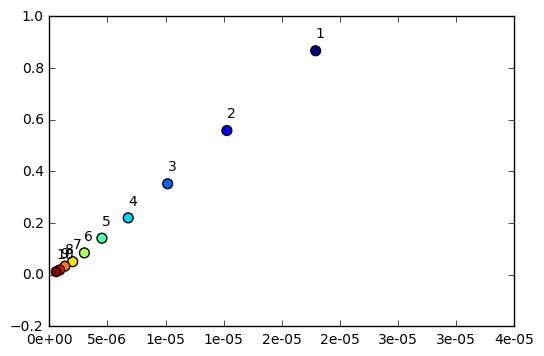

In [46]:
# Absorbancia en funcion de la concentración conocida
color=np.linspace(0, 1, len(rhob_known_conc))
plt.scatter(rhob_known_conc, rhob_max_abs[:,1], c=color, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
plt.legend()
plt.xlim(0, 0.00004)
ax=plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

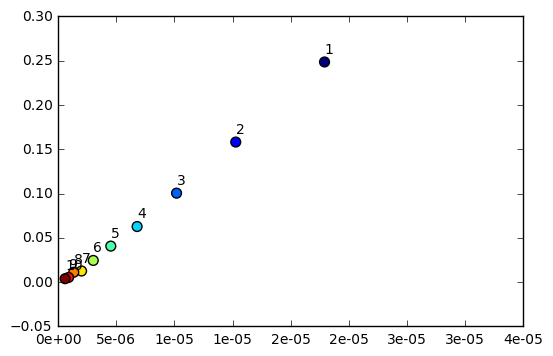

In [47]:
plt.scatter(rhob_known_conc, rhob_max_2[:,1], c=color, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_2[i,1]+0.01, str(rhob_measure_n[i]))
plt.xlim(0, 0.00004)
ax=plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

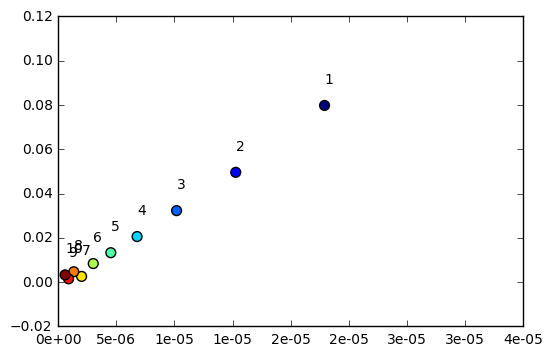

In [48]:
plt.scatter(rhob_known_conc, rhob_max_3[:,1], c=color, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_3[i,1]+0.01, str(rhob_measure_n[i]))
plt.xlim(0, 0.00004)
ax=plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))


Recordemos que la absorbancia se relaciona con la concentración mediante
$$A=\epsilon c l,\ l=1cm$$

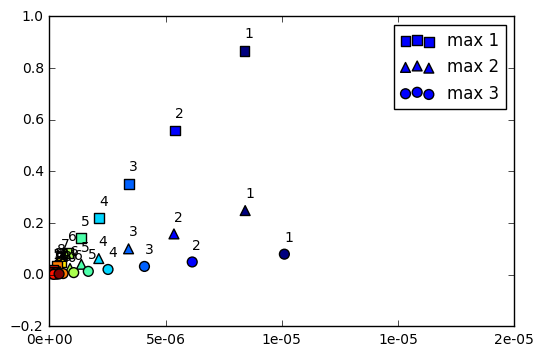

In [58]:
rhob_calc_conc_abs = []
rhob_calc_conc_2 = []
rhob_calc_conc_3 = []

for i in range(len(rhob_known_conc)):
    rhob_calc_conc_abs.append(rhob_max_abs[i,1]/rhob_ext_coeff(rhob_max_abs[i,0]))
    rhob_calc_conc_2.append(rhob_max_2[i,1]/rhob_ext_coeff(rhob_max_2[i,0]))
    rhob_calc_conc_3.append(rhob_max_3[i,1]/rhob_ext_coeff(rhob_max_3[i,0]))

rhob_calc_conc_abs = np.array(rhob_calc_conc_abs)
rhob_calc_conc_2 = np.array(rhob_calc_conc_2)
rhob_calc_conc_3 = np.array(rhob_calc_conc_3)

plt.scatter(rhob_calc_conc_abs, rhob_max_abs[:,1], c=color, s=50, marker='s', label='max 1')
plt.scatter(rhob_calc_conc_2, rhob_max_2[:,1], c=color, s=50, marker='^', label='max 2')
plt.scatter(rhob_calc_conc_3, rhob_max_3[:,1], c=color, s=50, marker='o', label='max 3')
for i in range(len(rhob_known_conc)):
    plt.text(rhob_calc_conc_abs[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_2[i], rhob_max_2[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_3[i], rhob_max_3[i,1]+0.05, str(rhob_measure_n[i]))
plt.xlim(0, 2e-5)
plt.legend()
ax=plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))


36571.8379664 103274.154702


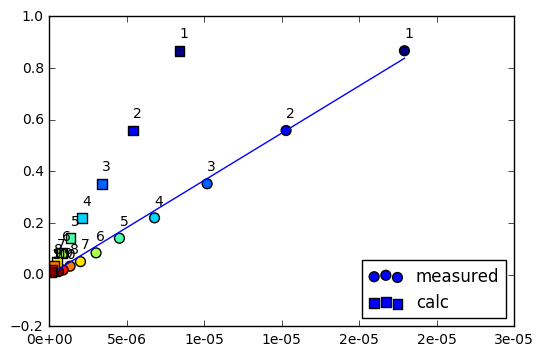

In [60]:
color=np.linspace(0, 1, len(rhob_known_conc))
plt.scatter(rhob_known_conc, rhob_max_abs[:,1], c=color, s=50, label='measured')
plt.scatter(rhob_calc_conc_abs, rhob_max_abs[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_abs[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00006)


rhob_abs_popt, rhob_abs_pcov = curve_fit(func, \
                                           rhob_known_conc[:], rhob_max_abs[:,1])
plt.plot(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_abs_popt))
print rhob_abs_popt[0], rhob_ext_coeff(rhob_max_abs[0,0])
plt.xlim(0, 3e-5)
ax=plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))


20891.2435524 29509.9070479


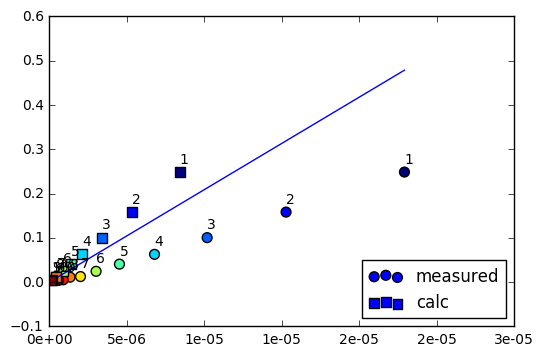

In [69]:
color=np.linspace(0, 1, len(rhob_known_conc))
plt.scatter(rhob_known_conc, rhob_max_2[:,1], c=color, s=50, label='measured')
plt.scatter(rhob_calc_conc_2, rhob_max_2[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_2[i,1]+0.02, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_2[i], rhob_max_2[i,1]+0.02, str(rhob_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00012)


rhob_2_popt, rhob_2_pcov = curve_fit(func, \
                                           rhob_known_conc[:], rhob_max_2[:,1])
rhob_2_popt*=2
plt.plot(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_2_popt))
print rhob_2_popt[0], rhob_ext_coeff(rhob_max_2[0,0])
plt.xlim(0, 3e-5)
ax=plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))


3339.94270712 7892.65992832


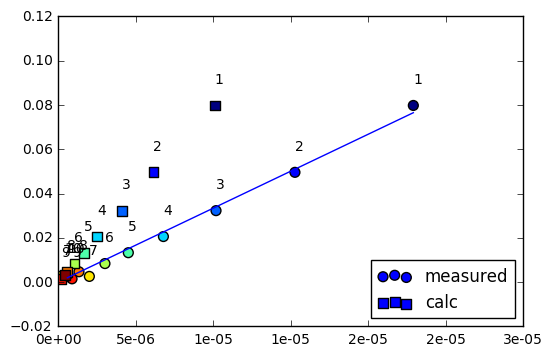

In [67]:
color=np.linspace(0, 1, len(rhob_known_conc))
plt.scatter(rhob_known_conc, rhob_max_3[:,1], c=color, s=50, label='measured')
plt.scatter(rhob_calc_conc_3, rhob_max_3[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_3[i,1]+0.01, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_3[i], rhob_max_3[i,1]+0.01, str(rhob_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00004)


rhob_3_popt, rhob_3_pcov = curve_fit(func, \
                                           rhob_known_conc[:], rhob_max_3[:,1])
#rhob_3_popt*=2
plt.plot(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_3_popt))
print rhob_3_popt[0], rhob_ext_coeff(rhob_max_3[0,0])
plt.xlim(0, 3e-5)
ax=plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))


[  8.39706703e-06   5.40696752e-06   3.41130848e-06   2.13315714e-06
   1.37013951e-06   8.21115411e-07   4.91894610e-07   3.21474430e-07
   1.78166551e-07   1.15704081e-07]
[  2.29126336e-05   1.52750891e-05   1.01833927e-05   6.78892848e-06
   4.52595232e-06   3.01730155e-06   2.01153436e-06   1.34102291e-06
   8.94015273e-07   5.96010182e-07]


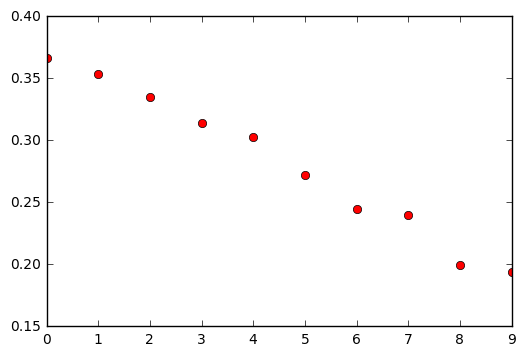

In [65]:
plt.plot(rhob_calc_conc_abs/rhob_known_conc, 'or')
print rhob_calc_conc_abs
print rhob_known_conc

In [ ]:
3*0.9/82